This section of the code was completed by Luheng. Thanks to the framework and ideas from Kerui.

In this section, we compared the results of two algorithms' outputs


By analyzing the visualized charts, we can conclude that while there are differences in the results of the two algorithms, both have achieved good performance, and their efficiency is generally consistent.t.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import calendar
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth, association_rules
import warnings
import csv

In [2]:
def categorize_covid_start(date):
    covid_start_date = pd.Timestamp('2020-02-27')
    if date <= covid_start_date:
        return 'Before'
    else:
        return 'After'

In [3]:
df=pd.read_csv('clean_class.csv')
df['date'] = pd.to_datetime(df['Date'])
df['month'] = df['date'].dt.strftime('%b')

In [4]:
lst = []
for i in range(len(df)):
    lst.append(list(df.iloc[i,[2,3,5,6,9]]))

In [5]:
te = TransactionEncoder()
te_ary = te.fit(lst).transform(lst)
new_df = pd.DataFrame(te_ary, columns=te.columns_)

In [6]:
apri = apriori(new_df, min_support=0.025, use_colnames=True)
apri_rules = association_rules(apri, metric="lift", min_threshold=1)
apri_ruless = apri_rules[(apri_rules['confidence'] > 0.5)&(apri_rules['antecedents'].apply(lambda x:len(x)>=2))&(apri_rules['consequents'].apply(lambda x:len(x)==1))]
apri_ruless.sort_values(by='confidence', inplace=True,ascending=False)
apri_rules_filtered = apri_rules
apri_ruless_filtered = apri_ruless

C:\Users\asus\AppData\Local\Temp\ipykernel_22732\4104382273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apri_ruless.sort_values(by='confidence', inplace=True,ascending=False)


In [7]:
fp = fpgrowth(new_df, min_support=0.025, use_colnames=True)
fp_rules = association_rules(fp, metric="lift", min_threshold=1)
fp_ruless = fp_rules[(fp_rules['confidence'] > 0.5)&(fp_rules['antecedents'].apply(lambda x:len(x)>=2))&(fp_rules['consequents'].apply(lambda x:len(x)==1))]
fp_ruless.sort_values(by='confidence', inplace=True,ascending=False)
fp_rules_filtered = fp_rules
fp_ruless_filtered = fp_ruless

C:\Users\asus\AppData\Local\Temp\ipykernel_22732\3576487603.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp_ruless.sort_values(by='confidence', inplace=True,ascending=False)


### Result Analysis and Presentation

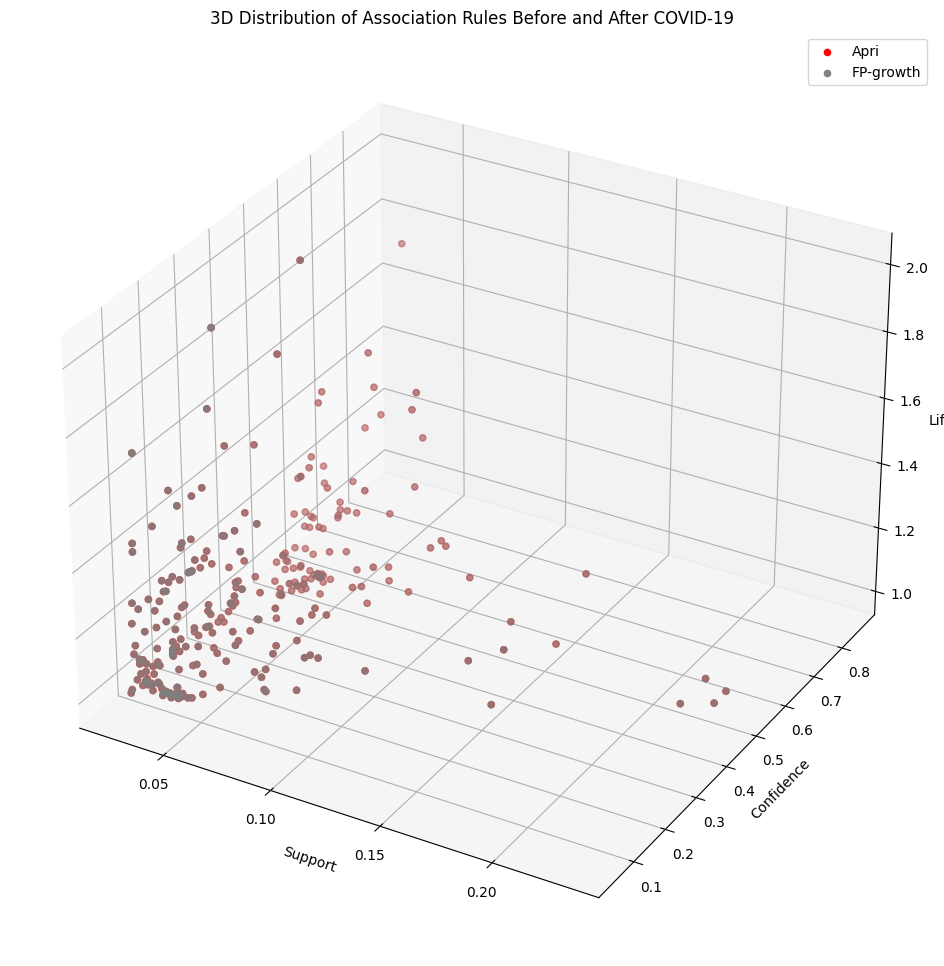

In [8]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

x_apri = apri_rules_filtered['support']
y_apri = apri_rules_filtered['confidence']
z_apri = apri_rules_filtered['lift']
x_fp = fp_rules_filtered['support']
y_fp = fp_rules_filtered['confidence']
z_fp = fp_rules_filtered['lift']

ax.scatter(x_apri, y_apri, z_apri, label='Apri',c='red')
ax.scatter(x_fp, y_fp, z_fp, label='FP-growth', c='gray')

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.legend()
ax.set_title("3D Distribution of Association Rules Before and After COVID-19")

plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_22732\1313771978.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


<Axes: xlabel='antecedent support', ylabel='consequent support'>

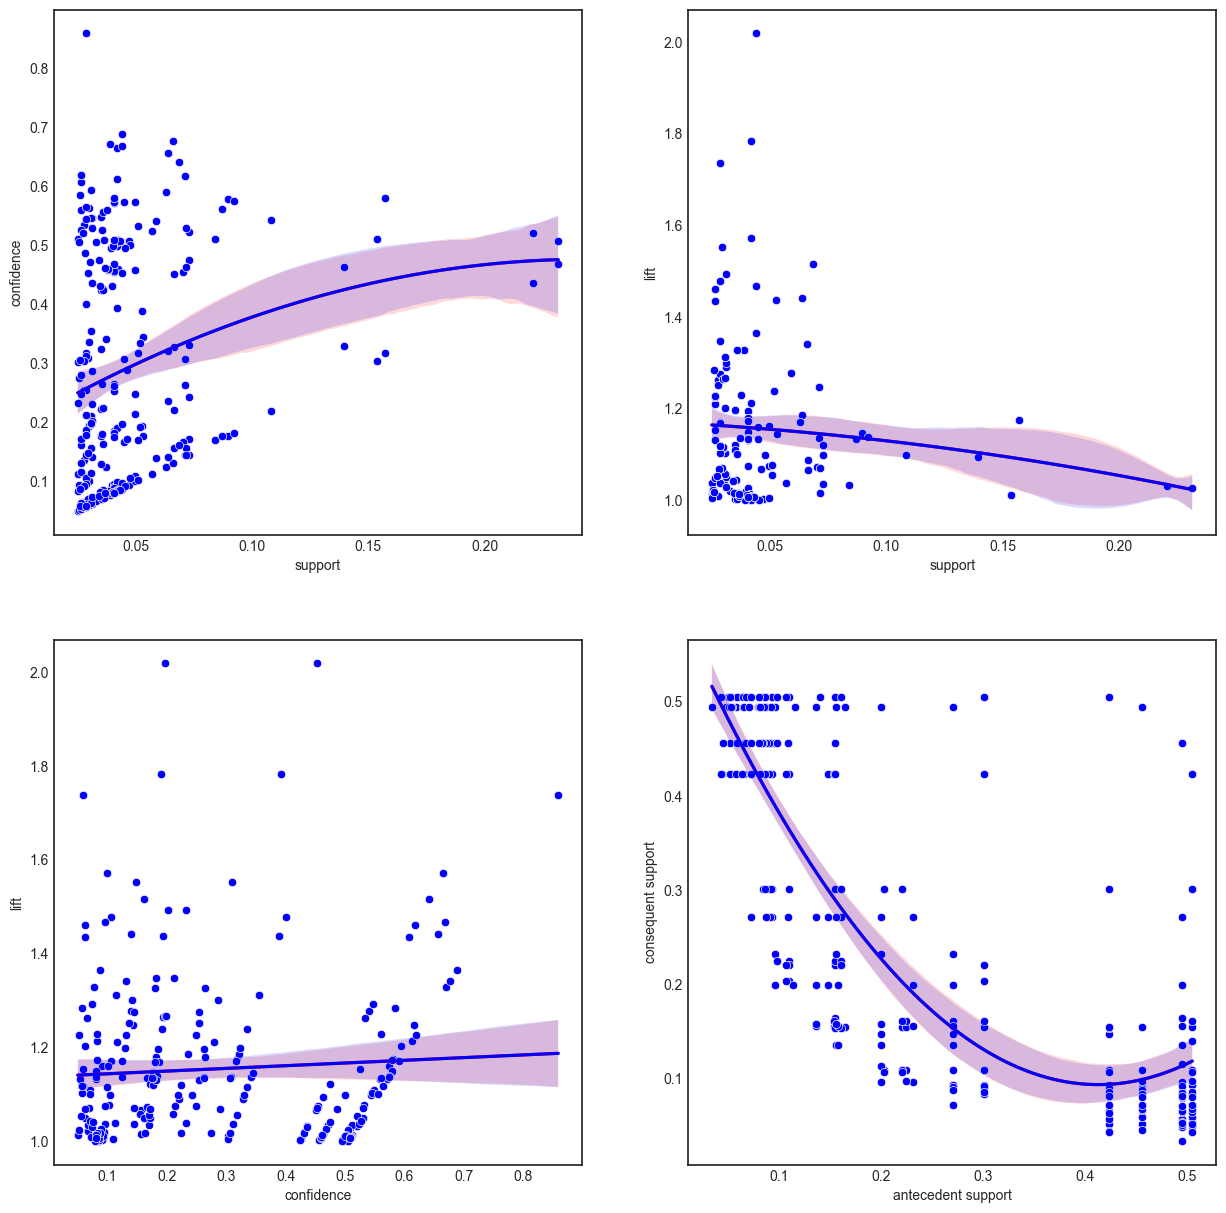

In [9]:
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')

plt.subplot(221)
sns.scatterplot(x="support", y="confidence", data=apri_rules_filtered, color='red')
sns.regplot(data=apri_rules_filtered, x='support', y='confidence', scatter=False, color='red', order=2)
sns.scatterplot(x="support", y="confidence", data=fp_rules_filtered, color='blue')
sns.regplot(data=fp_rules_filtered, x='support', y='confidence', scatter=False, color='blue', order=2)
plt.subplot(222)
sns.scatterplot(x="support", y="lift",data=apri_rules_filtered, color='red')
sns.regplot(data=apri_rules_filtered, x='support', y='lift', scatter=False, color='red',order=3)
sns.scatterplot(x="support", y="lift",data=fp_rules_filtered, color='blue')
sns.regplot(data=fp_rules_filtered, x='support', y='lift', scatter=False, color='blue',order=3)
plt.subplot(223)
sns.scatterplot(x="confidence", y="lift",data=apri_rules_filtered, color='red')
sns.regplot(data=apri_rules_filtered, x='confidence', y='lift', scatter=False, color='red',order=1)
sns.scatterplot(x="confidence", y="lift",data=fp_rules_filtered, color='blue')
sns.regplot(data=fp_rules_filtered, x='confidence', y='lift', scatter=False, color='blue',order=1)
plt.subplot(224)
sns.scatterplot(x="antecedent support", y="consequent support",data=apri_rules_filtered, color='red')
sns.regplot(data=apri_rules_filtered, x='antecedent support', y='consequent support', scatter=False, color='red',order=2)
sns.scatterplot(x="antecedent support", y="consequent support",data=fp_rules_filtered, color='blue')
sns.regplot(data=fp_rules_filtered, x='antecedent support', y='consequent support', scatter=False, color='blue',order=2)


C:\Users\asus\AppData\Local\Temp\ipykernel_22732\2797587250.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


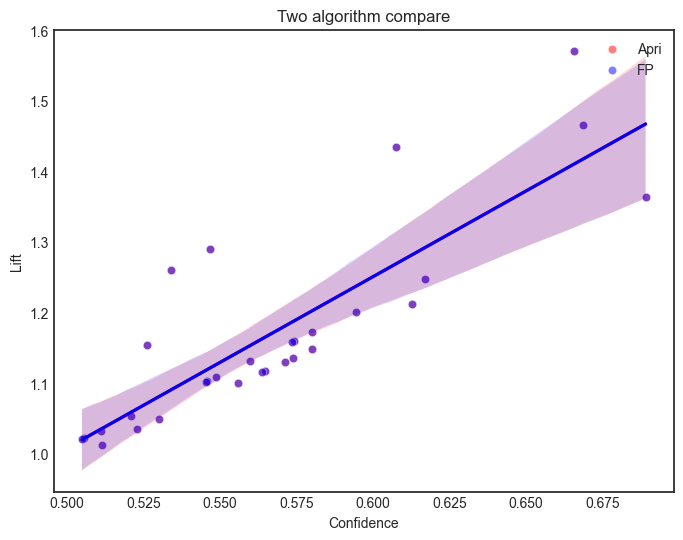

In [10]:
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-white')
sns.scatterplot(data=apri_ruless_filtered, x='confidence', y='lift', alpha=0.5, label='Apri', color='red')
sns.regplot(data=apri_ruless, x='confidence', y='lift', scatter=False, color='red')
sns.scatterplot(data=fp_ruless_filtered, x='confidence', y='lift', alpha=0.5, label='FP',color='blue')
sns.regplot(data=fp_ruless, x='confidence', y='lift', scatter=False, color='blue')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Two algorithm compare')
plt.legend()
plt.show()

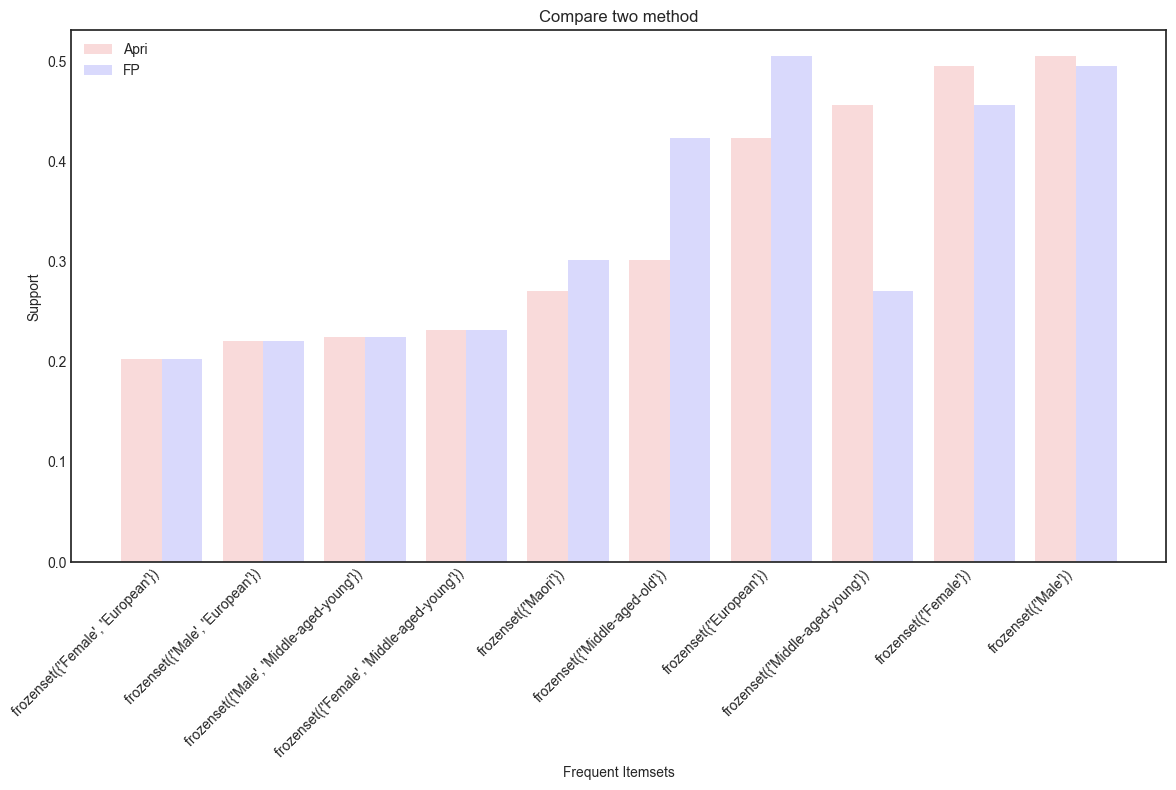

In [11]:
apri_sorted_df = apri.sort_values(by='support')
apri_sorted_df_top10 = apri_sorted_df.tail(10)

itemsets = apri_sorted_df_top10['itemsets'].astype(str)
support_in_apri = apri_sorted_df_top10['support']

itemsets_apri = apri_sorted_df_top10['itemsets']
itemsets_fp = fp['itemsets']
matching_items_fp = fp[itemsets_fp.isin(itemsets_apri)]
matching_items_fp_reversed = matching_items_fp[::-1]

color_red = (249/255.0, 218/255.0, 218/255.0)
color_blue = (217/255.0,217/255.0,252/255.0)
plt.figure(figsize=(12, 8))
x = np.arange(len(itemsets))
plt.bar(x - 0.2, support_in_apri, width=0.4, label='Apri', color=color_red)
plt.bar(x + 0.2, matching_items_fp_reversed['support'], width=0.4, label='FP', color=color_blue)

plt.xlabel('Frequent Itemsets')
plt.ylabel('Support')
plt.xticks(x, itemsets, rotation=45, ha="right")

plt.legend()
plt.title('Compare two method')
plt.tight_layout()
plt.show()
